In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pylab as plt

# 10 class, categories at Q3

# Loading csv files for training
print("reading csv file")
csv = pd.read_csv('data_formatted_classified_simple_10_Q3.csv', index_col=0)

pd_train_data = csv.iloc[:810000]
pd_test_data = csv.iloc[810000:900000]
benchmark_data = csv.iloc[900000:]

print(pd_train_data.head())
print(pd_test_data.head())

pd_train_data_target = pd_train_data.pop("future_hits") 
pd_test_data_target = pd_test_data.pop("future_hits") 

pd_train_data = pd_train_data.to_numpy()
pd_test_data = pd_test_data.to_numpy()

print(np.shape(pd_test_data))

def plot_history(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

2022-07-15 00:08:35.415831: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-15 00:08:35.415868: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


reading csv file
   id  key_search  future_hits
0   1           0            1
1   2           0            0
2   3           0            1
3   4           0            0
4   5           0            0
          id  key_search  future_hits
810000   570           0            0
810001  2165           0            0
810002   570           0            0
810003   102           0            0
810004  1932           0            0
(90000, 2)


2022-07-15 00:08:39.373945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-15 00:08:39.374269: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-15 00:08:39.374376: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-15 00:08:39.374463: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-15 00:08:39.374552: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/10
81000/81000 [==============================] - 132s 2ms/step - loss: 0.5619 - accuracy: 0.7508 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 2/10
81000/81000 [==============================] - 130s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 3/10
81000/81000 [==============================] - 131s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 4/10
81000/81000 [==============================] - 131s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 5/10
81000/81000 [==============================] - 125s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 6/10
81000/81000 [==============================] - 127s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 7/10
81000/81000 [==============================] - 124s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_

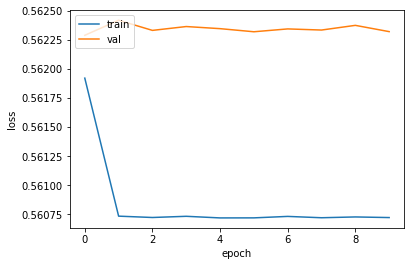

In [2]:
def setup_FCN_1():

    # Swquential Model is used.
    model = tf.keras.Sequential()

    # Consist of 4 Layers of nodes.
    # First layer consist of 2 nodes, to receive 2 inputs
    # Second layer consist of 12 nodes.
    # Third layer consist of  12 nodes.
    # Last Layer consist of 1 node, to output either 0 or 1
    # We are using binary_crossentropy as the loss function, hence the last layer is setup that way.

    model.add(tf.keras.layers.Dense(2, input_shape=(None, 2), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model using binary_crossentropy.
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # return the model after compilation
    return model

# Create and setting up the model using setup_FCN()
model = setup_FCN_1()
model.save('models/Q3_FCN1.h5')

# Use model.fit to train it. As we have a very large dataset, we do not have to train it multiple times.
history = model.fit(pd_train_data, pd_train_data_target, validation_data=(pd_test_data, pd_test_data_target), epochs=10, batch_size=10)

plot_history(history)

Epoch 1/10
81000/81000 [==============================] - 129s 2ms/step - loss: 0.5619 - accuracy: 0.7509 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 2/10
81000/81000 [==============================] - 137s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 3/10
81000/81000 [==============================] - 135s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 4/10
81000/81000 [==============================] - 136s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 5/10
81000/81000 [==============================] - 133s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 6/10
81000/81000 [==============================] - 127s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 7/10
81000/81000 [==============================] - 127s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_

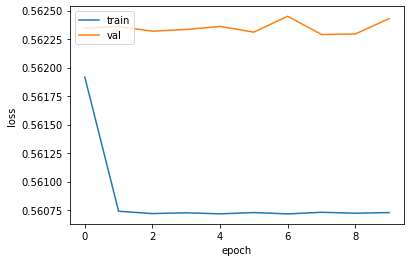

In [3]:
def setup_FCN_2():

    # Swquential Model is used.
    model = tf.keras.Sequential()

    # Consist of 4 Layers of nodes.
    # First layer consist of 2 nodes, to receive 2 inputs
    # Second layer consist of 12 nodes.
    # Third layer consist of  12 nodes.
    # Last Layer consist of 1 node, to output either 0 or 1
    # We are using binary_crossentropy as the loss function, hence the last layer is setup that way.

    model.add(tf.keras.layers.Dense(2, input_shape=(None, 2), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model using binary_crossentropy.
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # return the model after compilation
    return model

# Create and setting up the model using setup_FCN()
model = setup_FCN_2()
model.save('models/Q3_FCN2.h5')

# Use model.fit to train it. As we have a very large dataset, we do not have to train it multiple times.
history = model.fit(pd_train_data, pd_train_data_target, validation_data=(pd_test_data, pd_test_data_target), epochs=10, batch_size=10)

plot_history(history)

Epoch 1/10
81000/81000 [==============================] - 120s 1ms/step - loss: 0.5628 - accuracy: 0.7511 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 2/10
81000/81000 [==============================] - 119s 1ms/step - loss: 0.5610 - accuracy: 0.7515 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 3/10
81000/81000 [==============================] - 120s 1ms/step - loss: 0.5608 - accuracy: 0.7515 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 4/10
81000/81000 [==============================] - 120s 1ms/step - loss: 0.5608 - accuracy: 0.7515 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 5/10
81000/81000 [==============================] - 121s 1ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 6/10
81000/81000 [==============================] - 122s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 7/10
81000/81000 [==============================] - 125s 2ms/step - loss: 0.5608 - accuracy: 0.7515 - val_

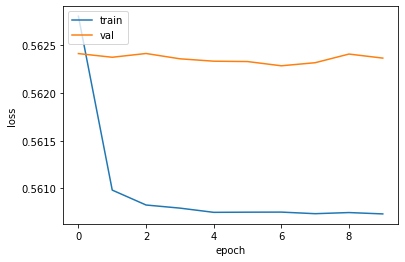

In [4]:
def setup_FCN_3():

    # Swquential Model is used.
    model = tf.keras.Sequential()

    # Consist of 4 Layers of nodes.
    # First layer consist of 2 nodes, to receive 2 inputs
    # Second layer consist of 12 nodes.
    # Third layer consist of  12 nodes.
    # Last Layer consist of 1 node, to output either 0 or 1
    # We are using binary_crossentropy as the loss function, hence the last layer is setup that way.

    model.add(tf.keras.layers.Dense(2, input_shape=(None, 2), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(32, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model using binary_crossentropy.
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # return the model after compilation
    return model

# Create and setting up the model using setup_FCN()
model = setup_FCN_3()
model.save('models/Q3_FCN3.h5')

# Use model.fit to train it. As we have a very large dataset, we do not have to train it multiple times.
history = model.fit(pd_train_data, pd_train_data_target, validation_data=(pd_test_data, pd_test_data_target), epochs=10, batch_size=10)

plot_history(history)

Epoch 1/10
81000/81000 [==============================] - 124s 2ms/step - loss: 0.5619 - accuracy: 0.7510 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 2/10
81000/81000 [==============================] - 124s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 3/10
81000/81000 [==============================] - 124s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 4/10
81000/81000 [==============================] - 123s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 5/10
81000/81000 [==============================] - 123s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 6/10
81000/81000 [==============================] - 123s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 7/10
81000/81000 [==============================] - 123s 2ms/step - loss: 0.5607 - accuracy: 0.7515 - val_

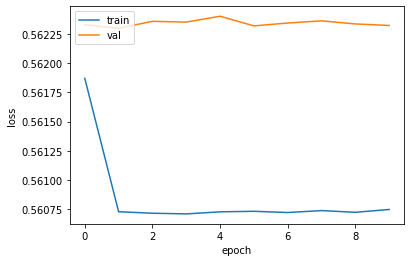

In [5]:
def setup_FCN_4():

    # Swquential Model is used.
    model = tf.keras.Sequential()

    # Consist of 4 Layers of nodes.
    # First layer consist of 2 nodes, to receive 2 inputs
    # Second layer consist of 12 nodes.
    # Third layer consist of  12 nodes.
    # Last Layer consist of 1 node, to output either 0 or 1
    # We are using binary_crossentropy as the loss function, hence the last layer is setup that way.

    model.add(tf.keras.layers.Dense(2, input_shape=(None, 2), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model using binary_crossentropy.
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # return the model after compilation
    return model

# Create and setting up the model using setup_FCN()
model = setup_FCN_4()

# Use model.fit to train it. As we have a very large dataset, we do not have to train it multiple times.
history = model.fit(pd_train_data, pd_train_data_target, validation_data=(pd_test_data, pd_test_data_target), epochs=10, batch_size=10)
model.save('models/Q3_FCN4.h5')

plot_history(history)

In [6]:
predict = model.predict(np.array([[65000, 0]]))
print(predict)

[[0.24586561]]
